In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pytz import timezone
import pytz
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline

import plotly
import plotly.graph_objs as go
from plotly.offline import plot
from plotly import tools

import math


In [2]:
# Read trip data
Data_X = pd.read_csv('UberPriceTrackX.csv')
Data_Pool = pd.read_csv('UberPriceTrackPool.csv')
Data_X.head()

,Time,None,Price,Duration,Distance,Wait_Time
0,2018-11-08 17:51:51.493805,1541699632,8.71,960,3.27,4
1,2018-11-08 17:55:56.128564,1541699877,8.71,960,3.27,3
2,2018-11-08 17:56:57.918118,1541699939,8.71,960,3.27,2
3,2018-11-08 17:57:59.659881,1541700001,8.71,960,3.27,2
4,2018-11-08 17:59:01.625413,1541700063,8.71,960,3.27,4


In [3]:
def time_converter(Data):
    
    """
    Converts given time from UTC to specified timezone
    """
    date = list(Data['Time'])

    converted_date = []
    
    for date in date:
        converted_date.append(convert_time(date))

    Data['Converted Time'] = converted_date
    Data_df = Data[['Time','Converted Time','Price','Duration','Distance','Wait_Time']]
    
    return Data_df, converted_date

def convert_time(dt):
    
    """
    Converts given time from UTC to specified timezone
    Also removes pytz timezone information as to not mess with plotting
    """
    
    date_format='%Y-%m-%d %H:%M:%S.%f'

    date_current_utc = datetime.strptime(dt, date_format)
    date_current_utc = pytz.utc.localize(date_current_utc).astimezone(pytz.UTC)
    
    date_changed = date_current_utc.astimezone(timezone('US/Pacific'))
    
    # Remove timezone information cause it messes with the plotting
    date_changed = date_changed.replace(tzinfo=None)
    return date_changed

In [4]:
Data_X, Converted_Date_X = time_converter(Data_X)
Data_Pool, Converted_Date_Pool = time_converter(Data_Pool)

In [5]:
Data_X.head()

,Time,Converted Time,Price,Duration,Distance,Wait_Time
0,2018-11-08 17:51:51.493805,2018-11-08 09:51:51.493805,8.71,960,3.27,4
1,2018-11-08 17:55:56.128564,2018-11-08 09:55:56.128564,8.71,960,3.27,3
2,2018-11-08 17:56:57.918118,2018-11-08 09:56:57.918118,8.71,960,3.27,2
3,2018-11-08 17:57:59.659881,2018-11-08 09:57:59.659881,8.71,960,3.27,2
4,2018-11-08 17:59:01.625413,2018-11-08 09:59:01.625413,8.71,960,3.27,4


In [6]:
# Dynamic Graphing for zoomable plots with overlays

trace_high = go.Scatter(
    x=Converted_Date_X,
    y=Data_X['Price'],
    name = "Uber X",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=Converted_Date_Pool,
    y=Data_Pool['Price'],
    name = "UberPool",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Uber Price Comparison',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)

# Unmute to generate plot
# plotly.offline.plot(fig, filename = "Price_Comparison_Plot.html")

Text(0,0.5,'Trip Price ($)')

<Figure size 432x288 with 0 Axes>

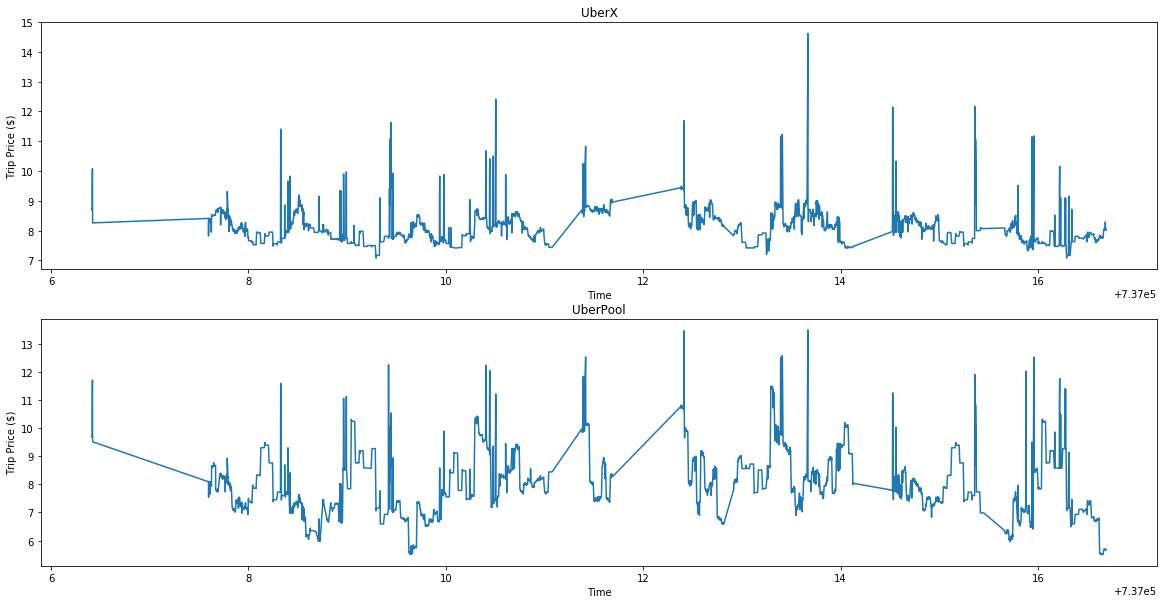

In [7]:
# Simpler inline plots

plt.subplots_adjust(hspace = 2)

f = plt.figure(figsize=(20,10))

ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

dates_X = matplotlib.dates.date2num(Data_X['Converted Time'].tolist())
ax.plot(dates_X, Data_X['Price'])
ax.set_title("UberX")
ax.set_xlabel('Time')
ax.set_ylabel('Trip Price ($)')

dates_Pool = matplotlib.dates.date2num(Data_Pool['Converted Time'].tolist())
ax2.plot(dates_Pool, Data_Pool['Price'])
ax2.set_title("UberPool")
ax2.set_xlabel('Time')
ax2.set_ylabel('Trip Price ($)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1163e4be0>]],
      dtype=object)

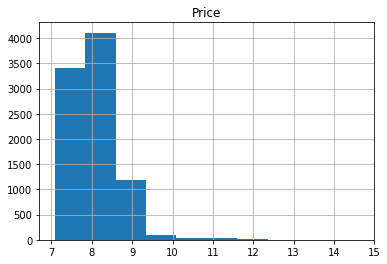

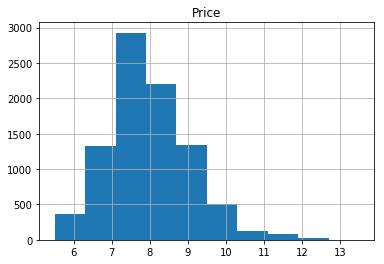

In [8]:
# Histograms for Pricing
Data_X.hist('Price')
Data_Pool.hist('Price')

# Regression

In [9]:
def get_hour_minute(s): 
    hours = s['Converted Time'].dt.hour.map(str)
    minutes = s['Converted Time'].dt.minute.map(str)
    
    hour_minute = hours + ':' + minutes
    s = []
    for i in hour_minute:
        s.append(datetime.strptime(i, '%H:%M'))
    return s

def get_day(Uber_data):
    Uber_data['days'] = pd.to_datetime(Uber_data['Converted Time']).dt.day_name()
    Uber_data['hour minute'] = get_hour_minute(Uber_data)
    return Uber_data



In [10]:
Data_X = get_day(Data_X)
Data_Pool = get_day(Data_Pool)

In [ ]:
# Remove data from weekend

Text(0,0.5,'Trip Price ($)')

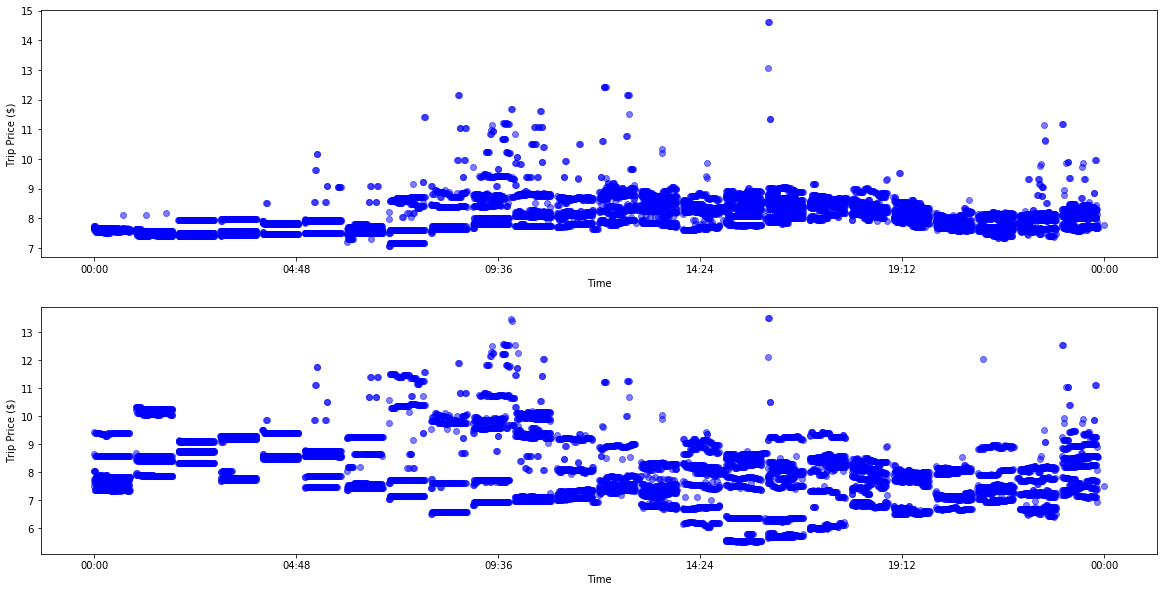

In [15]:

myFmt = mdates.DateFormatter('%H:%M')
f1 = plt.figure(figsize=(20,10))
ax3 = f1.add_subplot(211)
ax4 = f1.add_subplot(212)

# UberX
hour_X = matplotlib.dates.date2num(Data_X['hour minute'].tolist())
ax3.scatter(hour_X, Data_X['Price'], color='blue', 
            alpha=.5, label = 'took transit')
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_xlabel('Time')
ax3.set_ylabel('Trip Price ($)')

# UberPool
hour_Pool = matplotlib.dates.date2num(Data_Pool['hour minute'].tolist())
ax4.scatter(hour_Pool, Data_Pool['Price'], color='blue', 
            alpha=.5, label = 'took transit')
ax4.xaxis.set_major_formatter(myFmt)
ax4.set_xlabel('Time')
ax4.set_ylabel('Trip Price ($)')